In [1]:
import cv2 
import os 
import numpy as np 
import matplotlib.pyplot as plt
from keras import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
def preprocess_image(image, target_size=(224, 224)):
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    # Normalize the pixel values to [0, 1]
    image = image.astype(np.float32) / 255.0
    return image

#locations of dataset folders
dataset_dir = r"C:\Users\HP\Desktop\python\MICC-F220"


In [3]:
# Load mixed images and labels (1: authentic, 0: forgery)
images = []
labels = []

image_filenames = os.listdir(dataset_dir)
for filename in image_filenames:
    image_path = os.path.join(dataset_dir, filename)
    image = cv2.imread(image_path)
    if image is not None:
        images.append(preprocess_image(image))

        # Assuming the ground truth label is part of the image filename
        label = 1 if 'scale' in filename else 0
        labels.append(label)

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)


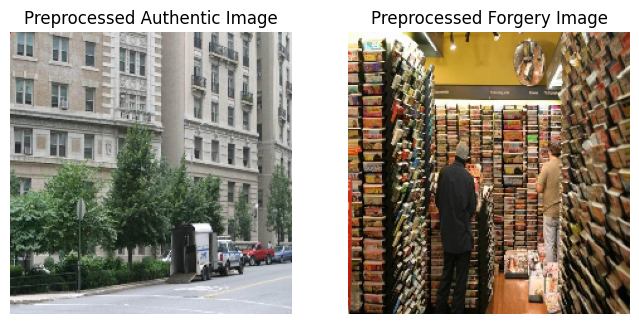

In [4]:
# Example usage - visualize the first authentic and forgery images after preprocessing
authentic_image = images[labels == 1][0]
forgery_image = images[labels == 0][0]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(authentic_image, cv2.COLOR_BGR2RGB))
plt.title("Preprocessed Authentic Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(forgery_image, cv2.COLOR_BGR2RGB))
plt.title("Preprocessed Forgery Image")
plt.axis('off')

plt.show()

In [5]:
# Function to create the CNN model
def create_copy_move_detection_model(input_shape=(224, 224, 3), num_classes=2):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output to feed into dense layers
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))  # Apply dropout before the final dense layer

    model.add(layers.Dense(num_classes, activation='softmax')) 

    return model

In [6]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [7]:
# Example usage - create the model and compile it

input_shape = (224, 224, 3)  # Replace this with your input image shape
num_classes = 2  # For binary classification (forgery vs. authentic)

# Create the CNN model
model = create_copy_move_detection_model(input_shape, num_classes)


In [8]:
# Compile the model
dam = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-08)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [9]:
# Train the model
epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
20/20 [==============================] - 41s 2s/step - loss: 0.7335 - accuracy: 0.6524 - val_loss: 0.5008 - val_accuracy: 0.6620
Epoch 2/10
20/20 [==============================] - 36s 2s/step - loss: 0.3557 - accuracy: 0.8594 - val_loss: 0.3258 - val_accuracy: 0.9155
Epoch 3/10
20/20 [==============================] - 39s 2s/step - loss: 0.2549 - accuracy: 0.9289 - val_loss: 0.2379 - val_accuracy: 0.9296
Epoch 4/10
20/20 [==============================] - 36s 2s/step - loss: 0.2356 - accuracy: 0.9258 - val_loss: 0.2824 - val_accuracy: 0.9155
Epoch 5/10
20/20 [==============================] - 36s 2s/step - loss: 0.2397 - accuracy: 0.9305 - val_loss: 0.1791 - val_accuracy: 0.9577
Epoch 6/10
20/20 [==============================] - 36s 2s/step - loss: 0.1937 - accuracy: 0.9479 - val_loss: 0.1728 - val_accuracy: 0.9577
Epoch 7/10
20/20 [==============================] - 35s 2s/step - loss: 0.2115 - accuracy: 0.9400 - val_loss: 0.1804 - val_accuracy: 0.9577
Epoch 8/10
20/20 [==

In [10]:
# Import the required libraries
import os

# Specify the directory path where you want to save the model
save_dir = r"C:\Users\HP\Desktop\python"  # Change this path to your desired location

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model to the specified directory
print("[INFO] saving image-forgery detector new model...")
model.save(os.path.join(save_dir, "forgery_new_detector.model"), save_format='tf')


[INFO] saving image-forgery detector new model...
INFO:tensorflow:Assets written to: C:\Users\HP\Desktop\python\forgery_new_detector.model\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Desktop\python\forgery_new_detector.model\assets


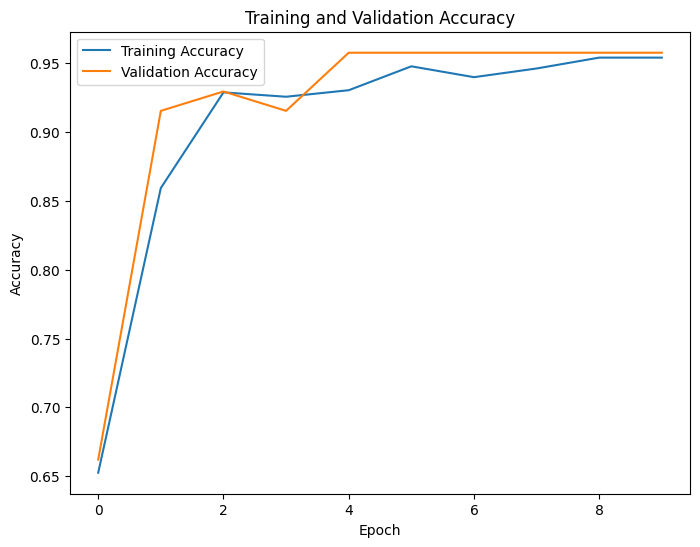

In [11]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Corrected key
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

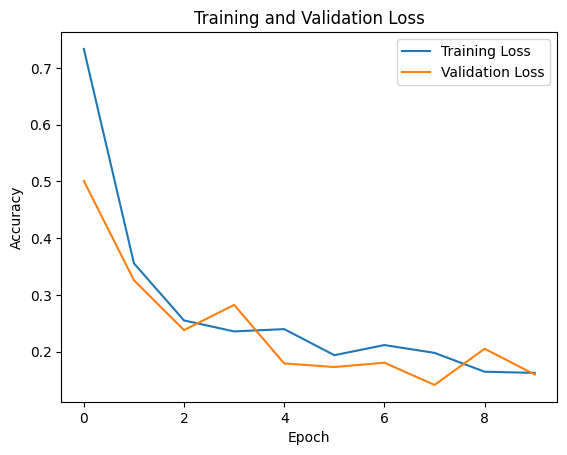

In [12]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [13]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 
accuracy = accuracy_score(y_test, y_pred_classes) 
precision = precision_score(y_test, y_pred_classes) 
recall = recall_score(y_test, y_pred_classes) 
f1 = f1_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes) 

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

6/6 [==============================] - 3s 390ms/step
Test Accuracy: 0.9431818181818182
Precision: 1.0
Recall: 0.8913043478260869
F1-score: 0.9425287356321839
Confusion Matrix:
[[84  0]
 [10 82]]
